# Quantum Systems Basics

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

## 1. Hadamard Gate

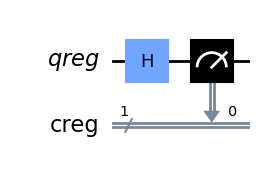

In [3]:
q =  QuantumRegister(1,"qreg")
c = ClassicalRegister(1,"creg")

qc = QuantumCircuit(q,c)

# (Hadamard: quantum coin-flipping) 
qc.h(q[0])
qc.measure(q,c)
qc.draw(output='mpl')

{'0': 5031, '1': 4969}

State 0 is observed with frequency % 50.31
State 1 is observed with frequency % 49.69



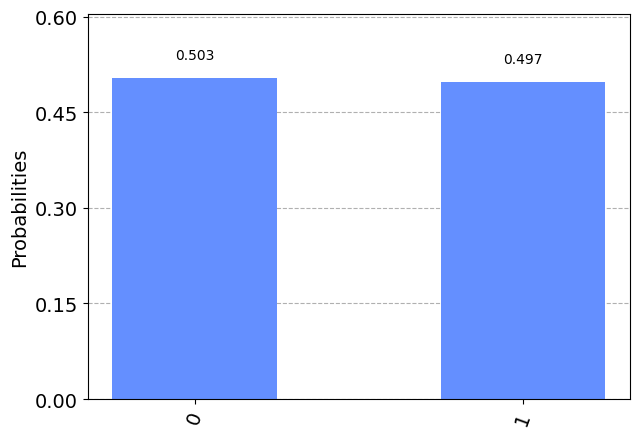

In [4]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts)

print()
n_zeros = counts['0']
n_ones = counts['1']
print("State 0 is observed with frequency %",100*n_zeros/(n_zeros+n_ones))
print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))

print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## 2. 2 H-Gates

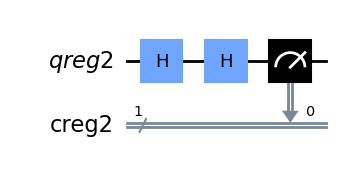

In [5]:
q2 =  QuantumRegister(1,"qreg2")
c2 = ClassicalRegister(1,"creg2")

qc2 = QuantumCircuit(q2,c2)
qc2.h(q2[0])
qc2.h(q2[0])

qc2.measure(q2,c2)

qc2.draw(output='mpl')

In [6]:
job = execute(qc2, Aer.get_backend('qasm_simulator'), shots=10000)
counts2 = job.result().get_counts(qc2)
print(counts2) # print the outcomes

{'0': 10000}


## Task 1

Design a quantum circuit with a single qubit.

The qubit is initially set to $ \ket{0} $.

Set the value of qubit to $ \ket{1} $ by using x-gate.

Experiment 1: Apply one Hadamard gate, make measurement, and execute your program 10000 times.

Experiment 2: Apply two Hadamard gates, make measurement, and execute your program 10000 times.

Compare your results.

### Experiment 1

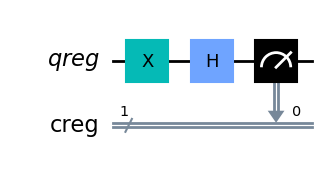

In [7]:
q =  QuantumRegister(1,"qreg")
c = ClassicalRegister(1,"creg")

qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.h(q[0])

qc.measure(q,c)
qc.draw(output='mpl')

In [8]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)

counts = job.result().get_counts(qc)
print(counts)

{'1': 5023, '0': 4977}


### Experiment 2

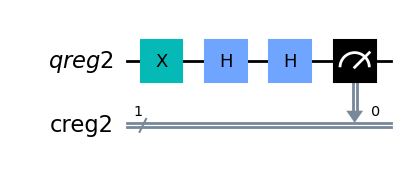

In [9]:
q2 =  QuantumRegister(1,"qreg2")
c2 = ClassicalRegister(1,"creg2")


qc2 = QuantumCircuit(q2,c2)

qc2.x(q2[0])
qc2.h(q2[0])
qc2.h(q2[0])


qc2.measure(q2,c2)
qc2.draw(output='mpl')

In [11]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=10000)

counts2 = job.result().get_counts(qc2)
print(counts2)

{'1': 10000}


## Superposition and Measurement

### Task 2: Two quantum coin flips

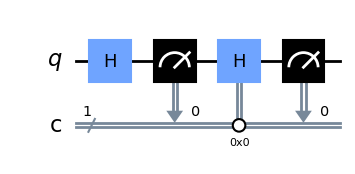

In [12]:
q = QuantumRegister(1,"q")
c = ClassicalRegister(1,"c")

qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.measure(q,c)
# apply the second Hadamard if the measurement outcome is 0
qc.h(q[0]).c_if(c,0)
qc.measure(q[0],c)

display(qc.draw(output="mpl"))

In [13]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

{'0': 256, '1': 744}


<h3> Task 3 </h3>

Repeat the previous experiment with the following modifications.

Start in state $ \ket{1} $.

Apply a Hadamard gate.

Make a measurement. 

If the measurement outcome is 0, stop.

Otherwise, apply a second Hadamard, and then make a measurement.

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

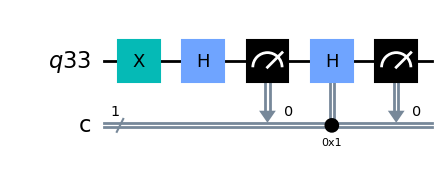

In [14]:
q = QuantumRegister(1)
c = ClassicalRegister(1,"c")

qc = QuantumCircuit(q,c)
# start in state |1>
qc.x(q[0])
qc.h(q[0])

qc.measure(q,c)
qc.h(q[0]).c_if(c,1)

qc.measure(q[0],c)

display(qc.draw(output="mpl"))

We expect to see outcome '0' and '1' with frequency %75 and %25, respectively.

In [15]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

{'1': 255, '0': 745}


<h3> Task 4</h3>

Design the following randomly created quantum circuit.

Start in state $ \ket{0} $.

    apply a Hadamard operator
    make a measurement
    REPEAT 4 times: 
        randomly pick x in {0,1}
        if the classical bit is x:
            apply a Hadamard operator
        make a measurement
        
Draw your circuit, and guess the expected frequency of observing '0' and '1' if the circuit is executed 10000 times.

Then, execute your circuit 10000 times, and compare your result with the simulator result.

Repeat execution a few more times.

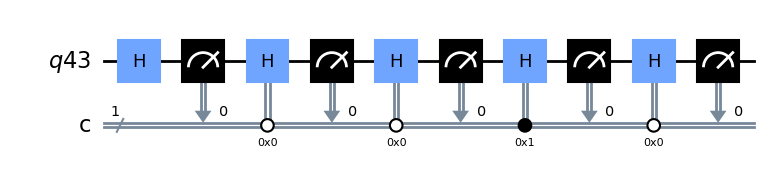

In [16]:
from random import randrange

q = QuantumRegister(1)
c = ClassicalRegister(1,"c")

qc = QuantumCircuit(q,c)

shot = 10000

observe = [0,0]

qc.h(q[0])
qc.measure(q,c)
observe = [shot/2,shot/2]

for i in range(4):
    x = randrange(2)
    if x==0:
        observe[0] = observe[0] / 2 
        observe[1] = observe[1] + observe[0]
    else:
        observe[1] = observe[1] / 2 
        observe[0] = observe[0] + observe[1]
    qc.h(q[0]).c_if(c,x)
    qc.measure(q,c)

display(qc.draw(output="mpl"))

In [17]:
print('0:',round(observe[0]),'1:',round(observe[1]))

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=shot)
counts = job.result().get_counts(qc)   
print(counts)

0: 2812 1: 7188
{'1': 7151, '0': 2849}
